<AxesSubplot: xlabel='class', ylabel='count'>

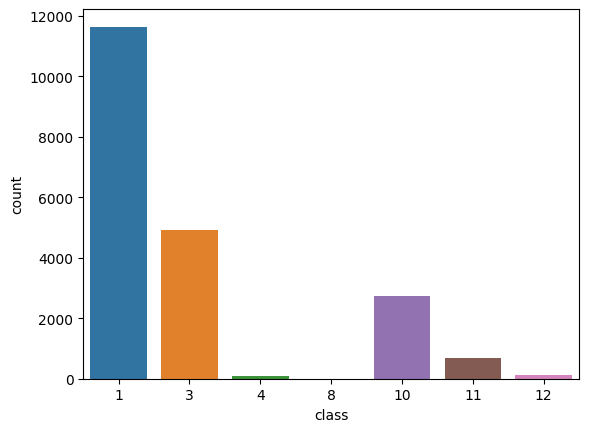

In [2]:
import pandas as pd   #gerekli kütüphanelerimizi(paketlerimizi) belirledik
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time 
import seaborn as sns 

col_list = ['frame_number','identity_number','left','top','width','height','score','class','visibility'] #tablomuzun(veri seti) başlıklarını belirledik

data = pd.read_csv('gt.txt',names = col_list) #gt.txt dosyasındaki verileri pandas kütüphanesiyle içe aktardık

plt.figure()
sns.countplot(x='class',data=data)  #bu kısım bize kaç farklı sınıfımız classımız olduğunu söylüyor
print(data.head())
car = data[data['class'] == 3] #araba classlarını car değişkenine atadık

videoPath = "deneme.mp4" #videonun pathini belirledik

cap = cv2.VideoCapture(videoPath) 

id1 = 29 # identity number'ı 29 numaraları olan aracaı takip edeceğimizden dolayı 29 a eşitledik

numberOfImage = np.max(data['frame_number']) #kaç adet frame oldugunu öğrendik
print(numberOfImage)
fps = 25 #fps imizi 25 olarak belirledik (bu sitede yazıyordu)
bound_box_list = []  # nesnelerin koordinat verileri için boş bir liste oluşturduk

for i in range(numberOfImage-1): #frame sayısı kadar dönen bir döngü oluşturduk
    ret,frame = cap.read() #frameleri okuduk

    if ret == False: #frameler'i okumak başarısız olursa döngüyü kırdık
        break

    frame = cv2.resize(frame,(960,540)) #framelerimizi 960 a 540 olmak üzere yeniden boyutlandırdık

    filter_id1 = np.logical_and(car['frame_number'] == i+1,car['identity_number']==id1)  #tek  bir araca odaklanacağımız için filtre uyguladık
    
    if len(car[filter_id1]) != 0: #eğer ki boş değilse
        x = int(car[filter_id1].left.values[0]/2) #koordinat değerlerini döndürdük x,y,widtg,heiht
        y = int(car[filter_id1].top.values[0]/2)
        w = int(car[filter_id1].width.values[0]/2)
        h = int(car[filter_id1].height.values[0]/2)

        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2) #bulduğumuz koordinat değerlerine bir dikdörtgen çizdirdik
        cv2.circle(frame,(int(x+w/2),int(y+h/2)),2,(0,0,255),-1) #koordinatları kullanarak merkez noktasına bir çember çizdirdik
        
        #frame,x,y,genislik,yukseklik,merkez x noktası,merkez y noktası 
        bound_box_list.append([i,x,y,w,h,int(x+w/2),int(y+h/2)])  #koordinat bilgilerini 'bound_box_list' listesine ekledik


    cv2.putText(frame,'frame number : '+str(i+1),(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2) #kaçıncı framede oldugumuzu öğrenmek için frameler ustune yazdırdık
    cv2.imshow('frame',frame) # ve framelerimizi imshowladık

    if cv2.waitKey(1) == ord('q'): # 'q' tuşuna basılınca döngümüzü kırdık
        break
cap.release #görüntüyü serbest bıraktık
cv2.destroyAllWindows()      #ve tüm pencereleri kapattık

# df = pd.DataFrame(bound_box_list,columns = ['frame_no','x','y','w','h','center_x','center_y'])
# df.to_csv('gt_new.txt',index = False)